In [85]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
path = "/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Datasets/Fruit.xlsx"

In [86]:
data = pd.read_excel(path)
data.rename(columns= {'Fruit Type':'Fruit_Type'},inplace = True)
data.loc[8,'Fruit_Type'] = 'Sweet'
data.Fruit_Type[data.Fruit_Type=='Sour'] = 0
data.Fruit_Type[data.Fruit_Type=='Sweet'] = 1
data["Fruit_Type"] = pd.to_numeric(data["Fruit_Type"])
data

/home/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Fruit,Sweetness,Soureness,Fruit_Type
0,Lemon,1,9,0
1,Grapfruit,2,8,0
2,Orange,3,7,0
3,Raspberry,2,8,0
4,Cherry,6,4,1
5,Banana,9,1,1
6,Grapes,8,2,1
7,Watermelon,9,1,1
8,Avacado,1,1,1
9,Strawberry,5,5,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Fruit         10 non-null object
Sweetness     10 non-null int64
Soureness     10 non-null int64
Fruit_Type    10 non-null int64
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [88]:
data.head()

,Fruit,Sweetness,Soureness,Fruit_Type
0,Lemon,1,9,0
1,Grapfruit,2,8,0
2,Orange,3,7,0
3,Raspberry,2,8,0
4,Cherry,6,4,1


In [89]:
X=data.iloc[:,1:3]
Y=data.iloc[:,3]


In [90]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.5,random_state = 19)

In [91]:
print("XTrain SHAPE: ",XTrain.shape)
print("XTest SHAPE: ",XTest.shape)
print("YTrain SHAPE: ",YTrain.shape)
print("YTest SHAPE: ",YTest.shape)
YTrain = YTrain.values.reshape(5,1)
YTest = YTest.values.reshape(5,1)
print("--------------")
print("YTrain SHAPE: ",YTrain.shape)
print("YTest SHAPE: ",YTest.shape)

XTrain SHAPE:  (5, 2)
XTest SHAPE:  (5, 2)
YTrain SHAPE:  (5,)
YTest SHAPE:  (5,)
--------------
YTrain SHAPE:  (5, 1)
YTest SHAPE:  (5, 1)


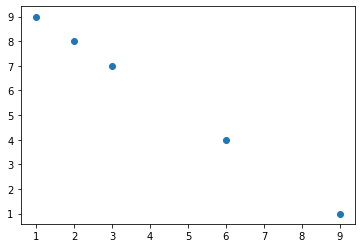

In [92]:
plt.scatter(XTrain['Sweetness'],XTrain['Soureness'])

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
teacher = KNeighborsClassifier(n_neighbors=3)

In [95]:
learner = teacher.fit(XTrain,YTrain)

/home/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


/home/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


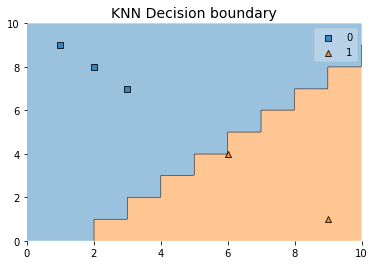

In [96]:
from mlxtend.plotting import plot_decision_regions
plt.figure()
xx = np.array(XTrain)
yy = np.array(YTrain)

plt.title("KNN Decision boundary",fontsize=14)
plot_decision_regions(xx,yy.ravel(), clf = teacher.fit(XTrain,YTrain))

In [97]:
Index_Name = ['Sour', 'Sweet']

In [98]:
p=learner.predict([[3,1]])
p.shape
Index_Name[p[0]]

'Sweet'

In [99]:
YPred = learner.predict(XTest)

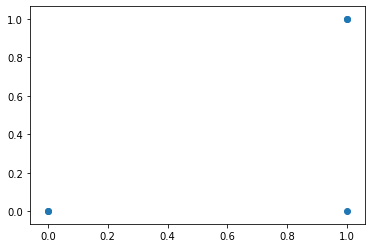

In [100]:
plt.scatter(YTest,YPred)

In [101]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(YTest,YPred)*100
accScore

80.0

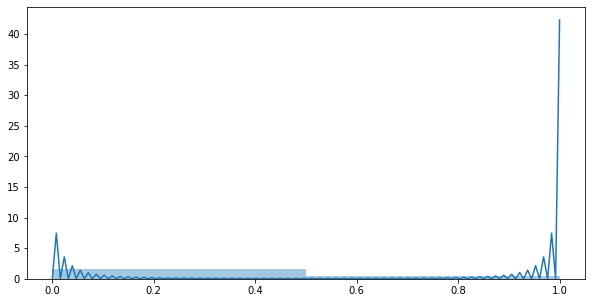

In [102]:
plt.figure(figsize=(10,5))
sns.distplot((YTest.reshape(-1,)-YPred.reshape(-1,)))
